# Exploratory Data Analysis & Data Storytelling

In this notebook we
1. Load '../Data/tweets_cleansed.csv' which is the output of data wrangling.
2. Ask & answer questions one by one.
3. Come to a conclusion and/or insights about sentiment analysis on movie reviews with tweets in the end.

### Import Packages

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

### Load Data

In [2]:
df = pd.read_csv('../Data/tweets_cleansed.csv')
df.head(20)

,Tweets
0,"I want to warn you because nobody warned me: ""Sierra Burgess is a Loser"" had me full-on crying by the end. I love this movie and really think you will too"
1,Burt Reynolds. True legend. Our hero. Funny as hell and a for-real badass. So many great movies. So many great stories. Such a great Dad. Will be missed by all. Deepest condolences to his family.
2,Our first film... #photo #photos #setphoto #steptomybeat #wildcardfilms #shortfilm #shortfilms #film #movie #movies #films #script #scripts #comingsoon #preproduction #production #filmproductioncompany #filmproduction #filmcompany #blackandwhite #blackandwhitephotography
3,"Want to win an awesome prize pack and 4 VIP tickets to see an early screening of THE HOUSE WITH A CLOCK IN ITS WALLS? Reply to post to enter into our drawing! Winner selected Mon, Sept 10th! #housewithaclock #movie #tickets #free #win #contestgiveaway #seattle #visitseattle"
4,Just spent 5.99 on this movie and definitely was not worth it!
5,The mandatory group photo after we finish filming a movie.. especially as one as specia as #SarkarDeepavali #Sarkar @ARMurugadoss @sunpictures
6,God Bless Friend .
7,I’ve never seen a Burt Reynolds movie
8,Watching @readyplayerone movie
9,Experience everything it takes to be the first. Ryan Gosling is Neil Armstrong. See #FirstMan in theaters and IMAX October 12.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10642 entries, 0 to 10641
Data columns (total 1 columns):
Tweets    10642 non-null object
dtypes: object(1)
memory usage: 83.2+ KB


## Top Questions:
1. How to identify useful tweets?
2. With all the useful tweets, which movie occurs most?

## Questions 1: How to identify useful tweets?

In [4]:
# Let's tokenize the tweets first.
df['Tweets_tokens'] = df['Tweets'].apply(word_tokenize)

In [5]:
df.head(20)

,Tweets,Tweets_tokens
0,"I want to warn you because nobody warned me: ""Sierra Burgess is a Loser"" had me full-on crying by the end. I love this movie and really think you will too","[I, want, to, warn, you, because, nobody, warned, me, :, ``, Sierra, Burgess, is, a, Loser, '', had, me, full-on, crying, by, the, end, ., I, love, this, movie, and, really, think, you, will, too]"
1,Burt Reynolds. True legend. Our hero. Funny as hell and a for-real badass. So many great movies. So many great stories. Such a great Dad. Will be missed by all. Deepest condolences to his family.,"[Burt, Reynolds, ., True, legend, ., Our, hero, ., Funny, as, hell, and, a, for-real, badass, ., So, many, great, movies, ., So, many, great, stories, ., Such, a, great, Dad, ., Will, be, missed, by, all, ., Deepest, condolences, to, his, family, .]"
2,Our first film... #photo #photos #setphoto #steptomybeat #wildcardfilms #shortfilm #shortfilms #film #movie #movies #films #script #scripts #comingsoon #preproduction #production #filmproductioncompany #filmproduction #filmcompany #blackandwhite #blackandwhitephotography,"[Our, first, film, ..., #, photo, #, photos, #, setphoto, #, steptomybeat, #, wildcardfilms, #, shortfilm, #, shortfilms, #, film, #, movie, #, movies, #, films, #, script, #, scripts, #, comingsoon, #, preproduction, #, production, #, filmproductioncompany, #, filmproduction, #, filmcompany, #, blackandwhite, #, blackandwhitephotography]"
3,"Want to win an awesome prize pack and 4 VIP tickets to see an early screening of THE HOUSE WITH A CLOCK IN ITS WALLS? Reply to post to enter into our drawing! Winner selected Mon, Sept 10th! #housewithaclock #movie #tickets #free #win #contestgiveaway #seattle #visitseattle","[Want, to, win, an, awesome, prize, pack, and, 4, VIP, tickets, to, see, an, early, screening, of, THE, HOUSE, WITH, A, CLOCK, IN, ITS, WALLS, ?, Reply, to, post, to, enter, into, our, drawing, !, Winner, selected, Mon, ,, Sept, 10th, !, #, housewithaclock, #, movie, #, tickets, #, free, #, win, #, contestgiveaway, #, seattle, #, visitseattle]"
4,Just spent 5.99 on this movie and definitely was not worth it!,"[Just, spent, 5.99, on, this, movie, and, definitely, was, not, worth, it, !]"
5,The mandatory group photo after we finish filming a movie.. especially as one as specia as #SarkarDeepavali #Sarkar @ARMurugadoss @sunpictures,"[The, mandatory, group, photo, after, we, finish, filming, a, movie.., especially, as, one, as, specia, as, #, SarkarDeepavali, #, Sarkar, @, ARMurugadoss, @, sunpictures]"
6,God Bless Friend .,"[God, Bless, Friend, .]"
7,I’ve never seen a Burt Reynolds movie,"[I, ’, ve, never, seen, a, Burt, Reynolds, movie]"
8,Watching @readyplayerone movie,"[Watching, @, readyplayerone, movie]"
9,Experience everything it takes to be the first. Ryan Gosling is Neil Armstrong. See #FirstMan in theaters and IMAX October 12.,"[Experience, everything, it, takes, to, be, the, first, ., Ryan, Gosling, is, Neil, Armstrong, ., See, #, FirstMan, in, theaters, and, IMAX, October, 12, .]"


In [6]:
# Reuse the keywords that we used to search tweets.
predefined_movies = [
    'adrift', \
    'bookclub', \
    'thehappyprince', \
    'Oceans8', \
    'inthefade', \
    'crazyrichasians', \
    'jurassicworld', \
    'missionimpossible', \
    'americananimals', \
    'incredibles2', \
    'mammamia']

In [7]:
# Confirm the tweets do have token that belong to the predefine keywords
def has_movie(tokens):
    found_tokens = []
    for token in tokens:
        if token.lower() in predefined_movies:
            found_tokens.append(token.lower())
    return np.nan if found_tokens == [] else found_tokens

df['Has_predefined_movies'] = df['Tweets_tokens'].apply(has_movie)

In [8]:
df.head(200)

,Tweets,Tweets_tokens,Has_predefined_movies
0,"I want to warn you because nobody warned me: ""Sierra Burgess is a Loser"" had me full-on crying by the end. I love this movie and really think you will too","[I, want, to, warn, you, because, nobody, warned, me, :, ``, Sierra, Burgess, is, a, Loser, '', had, me, full-on, crying, by, the, end, ., I, love, this, movie, and, really, think, you, will, too]",NaN
1,Burt Reynolds. True legend. Our hero. Funny as hell and a for-real badass. So many great movies. So many great stories. Such a great Dad. Will be missed by all. Deepest condolences to his family.,"[Burt, Reynolds, ., True, legend, ., Our, hero, ., Funny, as, hell, and, a, for-real, badass, ., So, many, great, movies, ., So, many, great, stories, ., Such, a, great, Dad, ., Will, be, missed, by, all, ., Deepest, condolences, to, his, family, .]",NaN
2,Our first film... #photo #photos #setphoto #steptomybeat #wildcardfilms #shortfilm #shortfilms #film #movie #movies #films #script #scripts #comingsoon #preproduction #production #filmproductioncompany #filmproduction #filmcompany #blackandwhite #blackandwhitephotography,"[Our, first, film, ..., #, photo, #, photos, #, setphoto, #, steptomybeat, #, wildcardfilms, #, shortfilm, #, shortfilms, #, film, #, movie, #, movies, #, films, #, script, #, scripts, #, comingsoon, #, preproduction, #, production, #, filmproductioncompany, #, filmproduction, #, filmcompany, #, blackandwhite, #, blackandwhitephotography]",NaN
3,"Want to win an awesome prize pack and 4 VIP tickets to see an early screening of THE HOUSE WITH A CLOCK IN ITS WALLS? Reply to post to enter into our drawing! Winner selected Mon, Sept 10th! #housewithaclock #movie #tickets #free #win #contestgiveaway #seattle #visitseattle","[Want, to, win, an, awesome, prize, pack, and, 4, VIP, tickets, to, see, an, early, screening, of, THE, HOUSE, WITH, A, CLOCK, IN, ITS, WALLS, ?, Reply, to, post, to, enter, into, our, drawing, !, Winner, selected, Mon, ,, Sept, 10th, !, #, housewithaclock, #, movie, #, tickets, #, free, #, win, #, contestgiveaway, #, seattle, #, visitseattle]",NaN
4,Just spent 5.99 on this movie and definitely was not worth it!,"[Just, spent, 5.99, on, this, movie, and, definitely, was, not, worth, it, !]",NaN
5,The mandatory group photo after we finish filming a movie.. especially as one as specia as #SarkarDeepavali #Sarkar @ARMurugadoss @sunpictures,"[The, mandatory, group, photo, after, we, finish, filming, a, movie.., especially, as, one, as, specia, as, #, SarkarDeepavali, #, Sarkar, @, ARMurugadoss, @, sunpictures]",NaN
6,God Bless Friend .,"[God, Bless, Friend, .]",NaN
7,I’ve never seen a Burt Reynolds movie,"[I, ’, ve, never, seen, a, Burt, Reynolds, movie]",NaN
8,Watching @readyplayerone movie,"[Watching, @, readyplayerone, movie]",NaN
9,Experience everything it takes to be the first. Ryan Gosling is Neil Armstrong. See #FirstMan in theaters and IMAX October 12.,"[Experience, everything, it, takes, to, be, the, first, ., Ryan, Gosling, is, Neil, Armstrong, ., See, #, FirstMan, in, theaters, and, IMAX, October, 12, .]",NaN


In [9]:
# Drop data points that are NOT really useful to us like "My childhood Halloween movies".
df = df.dropna()
df.head(200)

,Tweets,Tweets_tokens,Has_predefined_movies
223,We can’t help falling in love with the #CrazyRichAsians soundtrack! Listen now:,"[We, can, ’, t, help, falling, in, love, with, the, #, CrazyRichAsians, soundtrack, !, Listen, now, :]",[crazyrichasians]
278,"Find out how Jack-Jack lit up the big screen in #Incredibles2, then bring the movie home on October 23:","[Find, out, how, Jack-Jack, lit, up, the, big, screen, in, #, Incredibles2, ,, then, bring, the, movie, home, on, October, 23, :]",[incredibles2]
300,How many times have you seen #CrazyRichAsians? And who’s seeing it again this weekend?,"[How, many, times, have, you, seen, #, CrazyRichAsians, ?, And, who, ’, s, seeing, it, again, this, weekend, ?]",[crazyrichasians]
474,"I don’t wanna watch that ‘Crazy Rich Asians’ movie, because it will just remind me how crazy poor asian I am #CrazyRichAsians @KKCity","[I, don, ’, t, wan, na, watch, that, ‘, Crazy, Rich, Asians, ’, movie, ,, because, it, will, just, remind, me, how, crazy, poor, asian, I, am, #, CrazyRichAsians, @, KKCity]",[crazyrichasians]
622,"Ha! “Back next week”, hahaha nah yeah we were full of it. New ep out now on #CrazyRichAsians. Usual deal... 20 Q’s answered by our A’s hole, but also the debut of our first permanent Patreon question! Congrats Phil Joynson you’re awesome.Links to follow, chur #PodernFamily","[Ha, !, “, Back, next, week, ”, ,, hahaha, nah, yeah, we, were, full, of, it, ., New, ep, out, now, on, #, CrazyRichAsians, ., Usual, deal, ..., 20, Q, ’, s, answered, by, our, A, ’, s, hole, ,, but, also, the, debut, of, our, first, permanent, Patreon, question, !, Congrats, Phil, Joynson, you, ’, re, awesome.Links, to, follow, ,, chur, #, PodernFamily]",[crazyrichasians]
652,Fall in love with the movie that’s #1 in America three weeks in a row! #CrazyRichAsians | Get tickets: …,"[Fall, in, love, with, the, movie, that, ’, s, #, 1, in, America, three, weeks, in, a, row, !, #, CrazyRichAsians, |, Get, tickets, :, …]",[crazyrichasians]
666,Asians representing in the Hollywood right now are legit killing it and I couldn’t be anymore happier. And honestly we really need more movies like #ToAllTheBoysIveLovedBefore & #CrazyRichAsians... I’m completely in love with them.,"[Asians, representing, in, the, Hollywood, right, now, are, legit, killing, it, and, I, couldn, ’, t, be, anymore, happier, ., And, honestly, we, really, need, more, movies, like, #, ToAllTheBoysIveLovedBefore, &, #, CrazyRichAsians, ..., I, ’, m, completely, in, love, with, them, .]",[crazyrichasians]
992,The end of the park was just the beginning. Get @JurassicWorld #FallenKingdom now!,"[The, end, of, the, park, was, just, the, beginning, ., Get, @, JurassicWorld, #, FallenKingdom, now, !]",[jurassicworld]
1284,#JurassicWorld 3 concept poster by me. No idea where @colintrevorrow is going to take us but this a post apocalyptic feel to the movie. #JurassicPark,"[#, JurassicWorld, 3, concept, poster, by, me, ., No, idea, where, @, colintrevorrow, is, going, to, take, us, but, this, a, post, apocalyptic, feel, to, the, movie, ., #, JurassicPark]",[jurassicworld]
1999,Everyone go rent the movie #Adrift ! True story and @shailenewoodley is such a freaking AMAZING actress!!! #Sailing #LifeOrDeath #Blessed,"[Everyone, go, rent, the, movie, #, Adrift, !, True, story, and, @, shailenewoodley, is, such, a, freaking, AMAZING, actress, !, !, !, #, Sailing, #, LifeOrDeath, #, Blessed]",[adrift]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4053 entries, 223 to 10598
Data columns (total 3 columns):
Tweets                   4053 non-null object
Tweets_tokens            4053 non-null object
Has_predefined_movies    4053 non-null object
dtypes: object(3)
memory usage: 126.7+ KB


## Questions 2: With all the useful tweets, which movie occurs most?

In [11]:
from collections import defaultdict

def count_movie_occurrences():
    cntMap = defaultdict(int)
    
    for movies in list(df['Has_predefined_movies']):
        for movie in movies:
            cntMap[movie] += 1
            
    return cntMap
        
cntMap = count_movie_occurrences()

cnt_df = pd.DataFrame({'Movies' : list(cntMap.keys()), 'Count' : list(cntMap.values())})
cnt_df = cnt_df[['Movies', 'Count']]
cnt_df.head(20)

,Movies,Count
0,crazyrichasians,818
1,incredibles2,84
2,jurassicworld,1900
3,adrift,739
4,bookclub,524
5,americananimals,2
6,thehappyprince,54
7,inthefade,23
8,missionimpossible,79


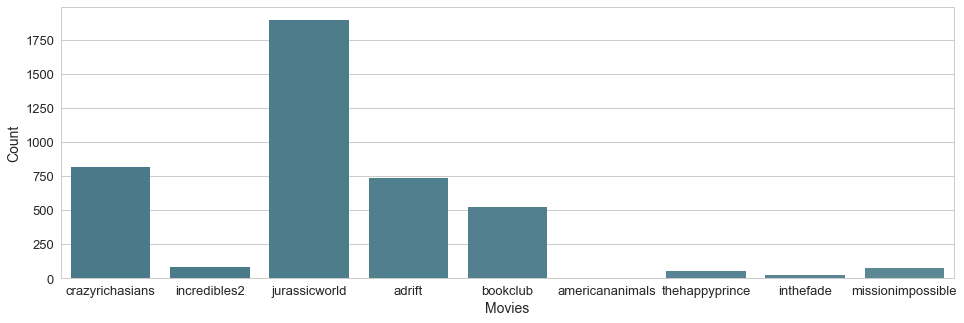

In [12]:
def get_sub_plot(width = 16, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def plot_bar_plot(x, y, df):
    ax = get_sub_plot()
    sns.barplot(x = 'Movies', y = 'Count', data = cnt_df)
    plt.show()
    
plot_bar_plot('Movies', 'Count', cnt_df)

TODO: So far Jurassic World occurs most.

## Follow-up Questions:
1. TODO

In [13]:
# Save dataframe for later
df.to_csv('../Data/tweets_eda.csv', index = False)

## Conclusion

1. TODO
    - TODO